In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

data = pd.read_csv('/content/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')

In [62]:
data_centered = data.copy()
data_centered['incomeperperson'] = data_centered['incomeperperson'].subtract(data_centered['incomeperperson'].mean())
data_centered['employrate'] = data_centered['employrate'].subtract(data_centered['employrate'].mean())
data_centered['femaleemployrate'] = data_centered['femaleemployrate'].subtract(data_centered['femaleemployrate'].mean())

print ('Mean of', data_centered[['incomeperperson']].mean())
print ('Mean of', data_centered[['employrate']].mean())
print ('Mean of', data_centered[['femaleemployrate']].mean())

Mean of incomeperperson   -1.148835e-13
dtype: float64
Mean of employrate   -1.652611e-14
dtype: float64
Mean of femaleemployrate   -3.552714e-15
dtype: float64


AttributeError: ignored

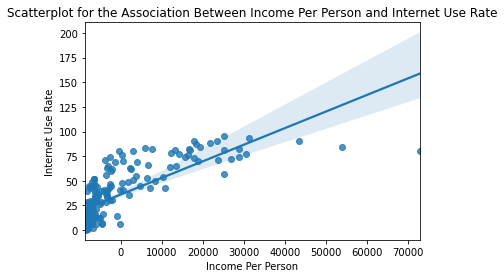

In [63]:
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate')
sns.plt.show()

In [65]:
reg1 = smf.ols('internetuserate ~ incomeperperson', data=data_centered).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.89e-34
Time:                        16:34:59   Log-Likelihood:                -792.90
No. Observations:                 183   AIC:                             1590.
Df Residuals:                     181   BIC:                             1596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          36.0622      1.371     26.308      0.000      33.357      38.767
incomeperperson     0.0017      0.000     15.299      0.000       0.001       0.002
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                5.081
Skew:                           0.012   Prob(JB):                       0.0788
Kurtosis:                       3.816   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
reg2 = smf.ols('internetuserate ~ incomeperperson + employrate + femaleemployrate', data=data_centered).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     117.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           3.57e-40
Time:                        16:35:05   Log-Likelihood:                -682.74
No. Observations:                 164   AIC:                             1373.
Df Residuals:                     160   BIC:                             1386.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.7210      1.236     29.710      0.000      34.280      39.162
incomeperperson      0.0020      0.000     17.905      0.000       0.002       0.002
employrate          -0.8694      0.235     -3.702      0.000      -1.333      -0.406
femaleemployrate     0.2960      0.167      1.776      0.078      -0.033       0.625
==============================================================================
Omnibus:                        3.515   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.430
Skew:                           0.353   Prob(JB):                        0.180
Kurtosis:                       2.939   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
reg3 = smf.ols('internetuserate ~ incomeperperson + I(incomeperperson**2)', data=data_centered).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     217.0
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.10e-48
Time:                        16:35:19   Log-Likelihood:                -756.56
No. Observations:                 183   AIC:                             1519.
Df Residuals:                     180   BIC:                             1529.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  42.0672      1.297     32.444      0.000      39.509      44.626
incomeperperson             0.0028      0.000     18.849      0.000       0.002       0.003
I(incomeperperson ** 2) -3.524e-08   3.76e-09     -9.367      0.000   -4.27e-08   -2.78e-08
==============================================================================
Omnibus:                       10.865   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.791
Skew:                           0.616   Prob(JB):                      0.00275
Kurtosis:                       2.824   Cond. No.                     5.87e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AttributeError: ignored

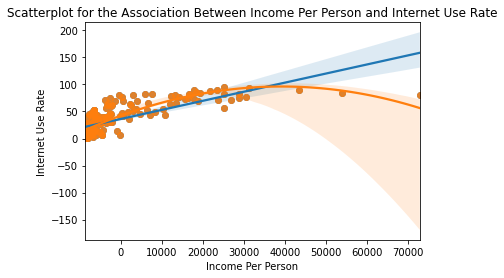

In [68]:
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
scat2 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, order=2, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate')
sns.plt.show()

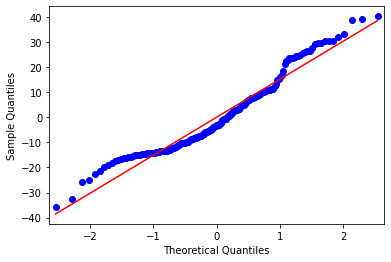

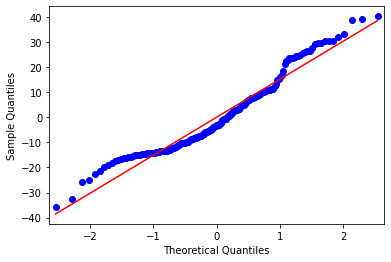

In [69]:
fig4 = sm.qqplot(reg3.resid, line='r')
fig4

AttributeError: ignored

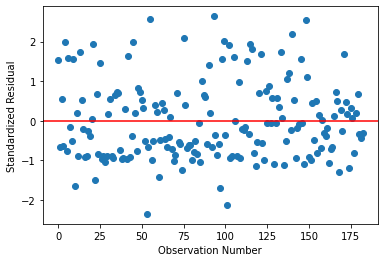

In [70]:
plt.figure()
stdres=pd.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
sns.plt.show()

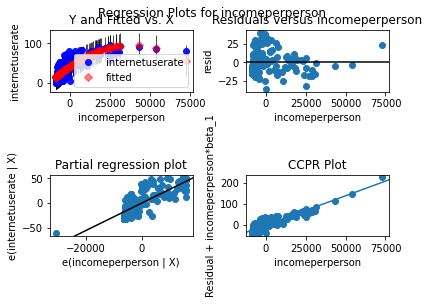

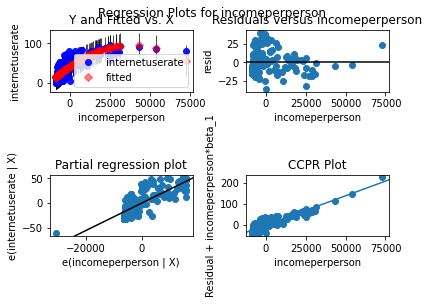

In [71]:
fig2 = plt.figure()
fig2 = sm.graphics.plot_regress_exog(reg3, "incomeperperson", fig=fig2)
fig2

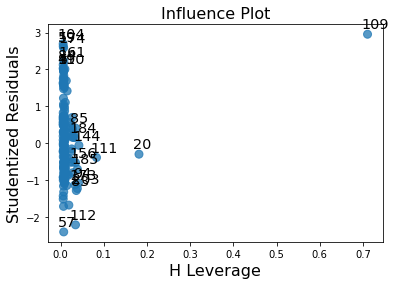

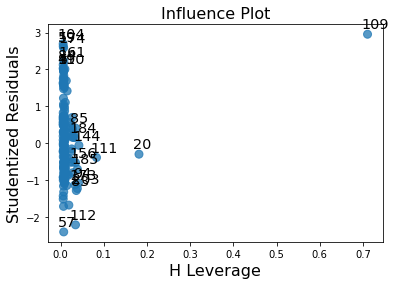

In [72]:
fig3=sm.graphics.influence_plot(reg3, size=8)
fig3